In [1]:
# pip install geopandas

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#data visualiztion
import seaborn as sns
import geopy.distance#for calculating distance between coordinates
import geopandas as gpd#for geospatial analysis
from mpl_toolkits.mplot3d import Axes3D
import math


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_train = pd.read_csv("train.csv",nrows=2_000_100)
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
2000095,2010-01-16 23:13:00.000000228,4.1,2010-01-16 23:13:00 UTC,-73.966672,40.752987,-73.973530,40.749475,2
2000096,2011-12-17 20:58:59.0000001,25.3,2011-12-17 20:58:59 UTC,-74.007601,40.705109,-73.952415,40.802372,1
2000097,2013-10-13 22:07:00.00000037,5.0,2013-10-13 22:07:00 UTC,-73.987300,40.738250,-73.979795,40.749142,1
2000098,2014-04-20 02:44:48.0000001,11.5,2014-04-20 02:44:48 UTC,-73.952423,40.652558,-73.913013,40.666714,1


In [4]:
df_test = pd.read_csv("test.csv")
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000100 entries, 0 to 2000099
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 122.1+ MB


In [6]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000100e+06,2.000100e+06,2.000100e+06,2.000086e+06,2.000086e+06,2.000100e+06
mean,1.134778e+01,-7.252308e+01,3.992953e+01,-7.252381e+01,3.992798e+01,1.684115e+00
std,9.852782e+00,1.286838e+01,7.983760e+00,1.277532e+01,1.032403e+01,1.314984e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [9]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Text(0.5, 1.0, 'Distribution of Fare amount')

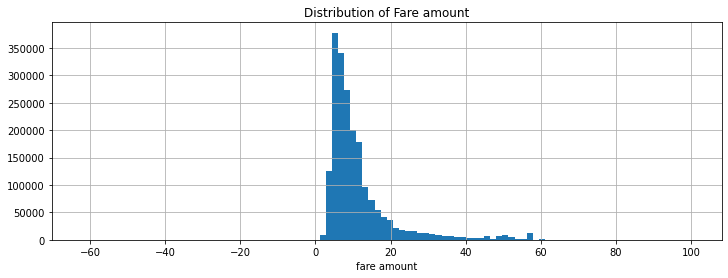

In [10]:
#Exploratory data analysis
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(12,4))
plt.xlabel('fare amount')
plt.title('Distribution of Fare amount')

Text(0.5, 1.0, 'Distribution of Passenger counts')

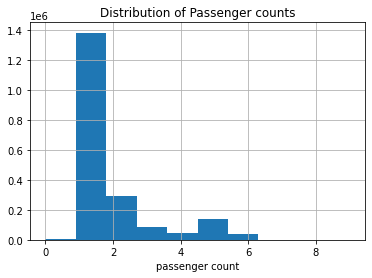

In [11]:
df_train[df_train.passenger_count<10].passenger_count.hist()
plt.xlabel('passenger count')
plt.title('Distribution of Passenger counts')

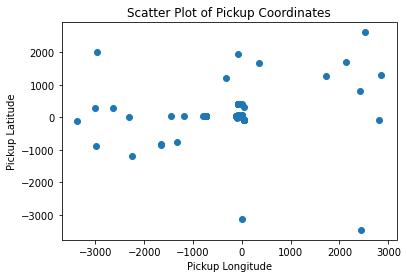

In [12]:
plt.scatter(df_train['pickup_longitude'], df_train['pickup_latitude'])
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.title('Scatter Plot of Pickup Coordinates')
plt.show()

In [13]:
def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance

In [14]:
df_train['distance'] = hav_dist(df_train['pickup_latitude'], df_train['pickup_longitude'],df_train['dropoff_latitude'], df_train['dropoff_longitude'])
df_test['distance'] = hav_dist(df_test['pickup_latitude'], df_test['pickup_longitude'],df_test['dropoff_latitude'], df_test['dropoff_longitude'])

In [15]:
#removing missing data
print(df_train.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
distance             14
dtype: int64


In [16]:
print('old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('new size: %d' % len(df_train))

old size: 2000100
new size: 2000086


Text(0.5, 1.0, 'Distance histogram')

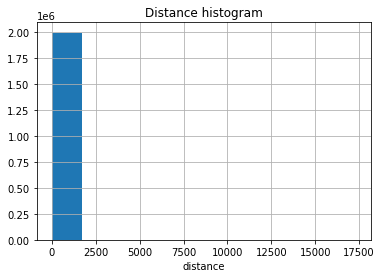

In [17]:
df_train.distance.hist()
plt.xlabel('distance')
plt.title('Distance histogram')

In [18]:
features = ['distance','passenger_count']
target = 'fare_amount'

X = df_train[features]
y= df_train[target]

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE on validation set: {rmse}')

RMSE on validation set: 9.758026387795482


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
 7   distance           9914 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 619.8+ KB


In [24]:
X_test = df_test[features]
filename = './output/predicted_fare'
y_final = model.predict(X_test)
submit = pd.DataFrame({'key': df_test.key, 'fare_amount': y_final},columns = ['key', 'fare_amount'])
submit.to_csv('submission.csv', index = False)